<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/B%C3%A0i_t%E1%BA%ADp_th%E1%BA%A7y_H%E1%BA%A1nh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BT1: Nghiên cứu mối liên hệ về mặt thống kê của các biến gender với điểm reading và writing (chuyển điểm về A, B, C, D); Nghiên cứu ảnh hưởng của lunch lên điểm thi các môn math; reading và writing (chuyển điểm về A, B, C, D).

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.sample(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
735,male,group C,master's degree,standard,none,67,57,59
7,male,group B,some college,free/reduced,none,40,43,39
191,male,group D,some college,standard,completed,76,83,79
34,male,group E,some college,standard,none,97,87,82
486,male,group D,some college,free/reduced,none,61,47,56
...,...,...,...,...,...,...,...,...
823,female,group B,high school,free/reduced,none,71,87,82
320,female,group C,high school,free/reduced,completed,67,79,84
894,female,group E,associate's degree,standard,none,59,62,69
495,male,group D,high school,standard,completed,68,64,66


Chuyển điểm cột Reading score về thang điểm A B C D


In [5]:
bins = [0, 60, 75, 85, 100]
gen_math_df = df[['gender', 'reading score']].copy()
gen_math_df['ThangDiem'] = pd.cut(gen_math_df['reading score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df.sample(100)

,gender,reading score,ThangDiem
709,female,61,C
429,male,63,C
739,male,60,D
224,female,66,C
548,female,67,C
...,...,...,...
993,female,72,C
878,female,72,C
181,female,64,C
990,male,81,B


Chuyển điểm cột writing score về thang điểm A B C D

In [6]:
bins = [0, 60, 75, 85, 100]
gen_math_df_wr = df[['gender', 'writing score']].copy()
gen_math_df_wr['ThangDiem'] = pd.cut(gen_math_df_wr['writing score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df_wr.sample(100)

,gender,writing score,ThangDiem
134,male,75,C
86,female,88,A
325,female,94,A
322,female,80,B
228,male,64,C
...,...,...,...
15,female,78,B
693,female,73,C
267,female,77,B
25,male,72,C


In [7]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [8]:
tanso_df = pd.crosstab(index=gen_math_df['gender'], columns=gen_math_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
gender,,,,
female,98,195,123,102
male,177,186,89,30


Tổng kết thang điểm ở phần writing score

In [9]:
tanso_dfr = pd.crosstab(index=gen_math_df_wr['gender'], columns=gen_math_df_wr['ThangDiem'])
tanso_dfr

ThangDiem,D,C,B,A
gender,,,,
female,100,187,137,94
male,201,184,70,27


So sánh biến gender với Thang điểm trong phần reading score


In [10]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

In [11]:
p ={}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,66.422785,2.488690e-14,3,Chấp nhận H1 với mức ý nghĩa 0.05


So sánh biến gender với Thang điểm trong phần writing score

In [12]:
score1, p_value1, dof1, expected1 = stats.chi2_contingency(tanso_dfr)

In [13]:
p ={}
p['score'] = score1
p['p_value'] = p_value1
p['dof'] = dof1
results(p)

,score,p_value,dof,KetLuan
,91.522401,1.031660e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Nghiên cứu ảnh hưởng của lunch lên điểm thi các môn math; reading và
writing (chuyển điểm về A, B, C, D).

Nghiên cứu ảnh hưởng của lunch lên điểm thi môn math

In [14]:
bins = [0, 60, 75, 85, 100]
gen_math_df_m = df[['lunch', 'math score']].copy()
gen_math_df_m['ThangDiem'] = pd.cut(gen_math_df_m['math score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df_m.sample(100)

,lunch,math score,ThangDiem
141,free/reduced,59,D
765,standard,74,C
840,free/reduced,39,D
863,standard,71,C
257,standard,78,B
...,...,...,...
836,standard,73,C
475,standard,71,C
168,standard,68,C
449,standard,81,B


In [15]:
tanso_df_m = pd.crosstab(index=gen_math_df_m['lunch'], columns=gen_math_df_m['ThangDiem'])
tanso_df_m

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,181,124,37,12
standard,157,263,134,91


In [16]:
score2, p_value2, dof2, expected = stats.chi2_contingency(tanso_df_m)

In [17]:
p ={}
p['score'] = score2
p['p_value'] = p_value2
p['dof'] = dof2
results(p)

,score,p_value,dof,KetLuan
,90.126341,2.057882e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Nghiên cứu ảnh hưởng của lunch lên điểm thi môn reading

In [18]:
bins = [0, 60, 75, 85, 100]
gen_math_df_r = df[['lunch', 'reading score']].copy()
gen_math_df_r['ThangDiem'] = pd.cut(gen_math_df_r['reading score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df_r.sample(100)

,lunch,reading score,ThangDiem
809,standard,54,D
212,free/reduced,62,C
638,standard,76,B
101,standard,74,C
320,free/reduced,79,B
...,...,...,...
335,free/reduced,68,C
3,free/reduced,57,D
974,standard,63,C
969,standard,84,B


In [19]:
tanso_df_r = pd.crosstab(index=gen_math_df_r['lunch'], columns=gen_math_df_r['ThangDiem'])
tanso_df_r

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,139,130,56,30
standard,136,251,156,102


In [20]:
score3, p_value3, dof3, expected = stats.chi2_contingency(tanso_df_r)

In [21]:
p ={}
p['score'] = score3
p['p_value'] = p_value3
p['dof'] = dof3
results(p)

,score,p_value,dof,KetLuan
,44.549719,1.153330e-09,3,Chấp nhận H1 với mức ý nghĩa 0.05


Nghiên cứu ảnh hưởng của lunch lên điểm thi môn writing

In [22]:
bins = [0, 60, 75, 85, 100]
gen_math_df_w = df[['lunch', 'writing score']].copy()
gen_math_df_w['ThangDiem'] = pd.cut(gen_math_df_w['writing score'], bins, labels=['D', 'C', 'B', 'A'])
gen_math_df_w.sample(100)

,lunch,writing score,ThangDiem
619,free/reduced,68,C
893,standard,75,C
500,standard,82,B
205,standard,78,B
251,free/reduced,83,B
...,...,...,...
262,free/reduced,51,D
378,standard,77,B
702,standard,87,A
467,free/reduced,65,C


In [23]:
tanso_df_w = pd.crosstab(index=gen_math_df_w['lunch'], columns=gen_math_df_w['ThangDiem'])
tanso_df_w

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,156,120,56,23
standard,145,251,151,98


In [24]:
score4, p_value4, dof4, expected = stats.chi2_contingency(tanso_df_w)

In [25]:
p ={}
p['score'] = score4
p['p_value'] = p_value4
p['dof'] = dof4
results(p)

,score,p_value,dof,KetLuan
,57.47865,2.031098e-12,3,Chấp nhận H1 với mức ý nghĩa 0.05


BT2: Kiểm định ANOVA 1 chiều

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [28]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [29]:
cl_df = pd.io.stata.read_stata("https://www.stata-press.com/data/r17/cholesterol.dta")

In [30]:
cl_df.sample(10)

,race,agegrp,chol,agemidpt,meangrp
37,Black,30–39,220.507324,35.0,201.394150
46,Black,40–59,210.020248,50.0,210.003769
48,White,40–59,206.643692,50.0,210.003769
63,Black,60–79,224.178284,70.0,220.615295
21,Black,20–29,203.053589,25.0,188.056671
18,White,20–29,201.929932,25.0,188.056671
6,Black,10–19,187.074249,15.0,179.853088
20,Other,20–29,181.349274,25.0,188.056671
1,Black,10–19,179.729446,15.0,179.853088
57,Black,40–59,226.025818,50.0,210.003769


So sánh trung bình Cholesterol giữa các nhóm sắc tộc Phát biểu giả
thuyết:

latexmath:[$H_{0}$]: Không có sự khác biệt về trung bình cholesterol
giữa 3 nhóm sắc tộc

latexmath:[$H_{1}$]: Có ít nhất 2 nhóm sắc tộc có trung bình cholesterol
khác nhau

*STEP 1: Chạy mô hình kiểm định ANOVA*

In [31]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [32]:
model = ols('chol ~ C(race)', data=cl_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [33]:
anova_table

,sum_sq,df,F,PR(>F)
C(race),669.278235,2.0,1.108161,0.33573
Residual,21742.341205,72.0,NaN,NaN


*STEP 2: Kiểm tra các điều kiện cho kiểm định Anova*

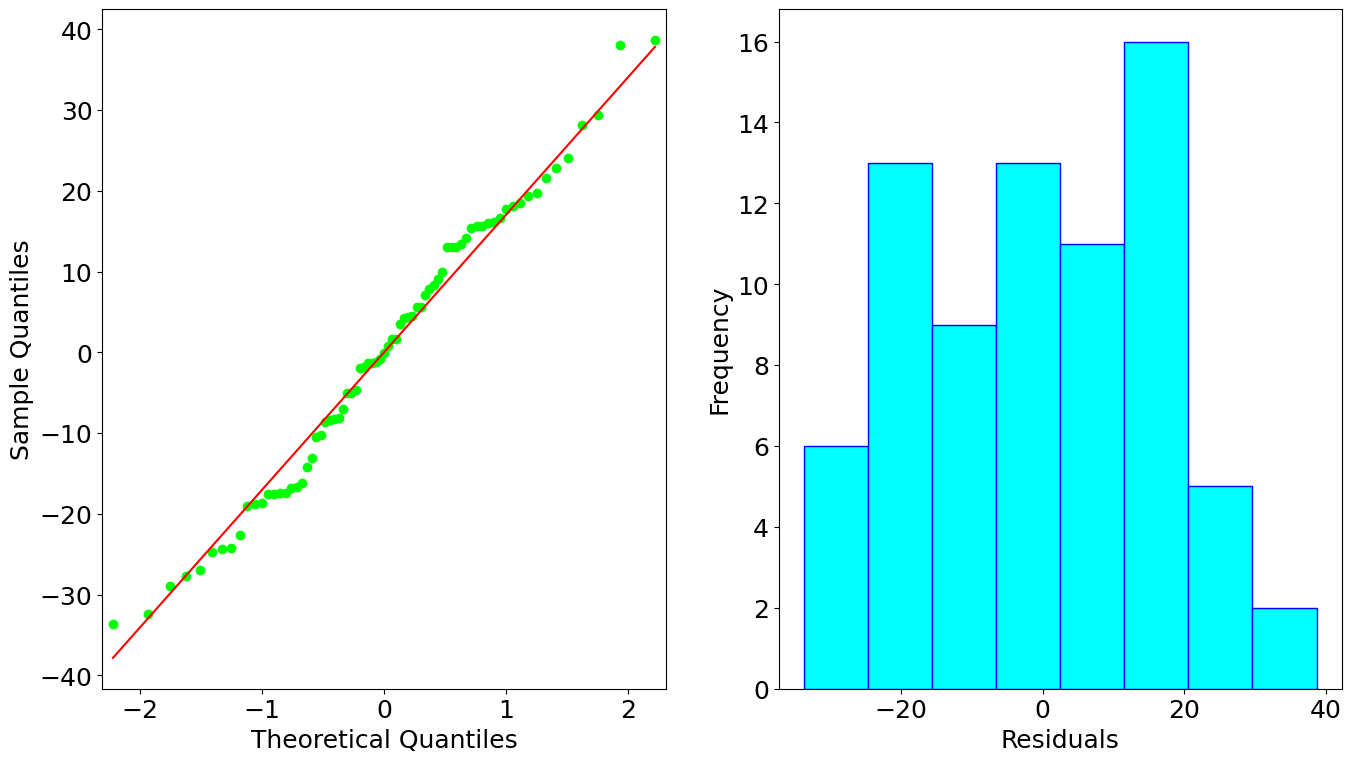

In [35]:
fig, ax = plt.subplots(1, 2)
# model.resid -> các giá trị thặng dư của model: dùng nó để kiểm tra điều kiện cho Anova

sm.qqplot(model.resid, line='s', ax=ax[0], color = 'lime')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
#stats.shapiro(model.resid)

In [36]:
# Sử dụng kiểm định shapiro cho chuẩn/không chuẩn
stats.shapiro(model.resid)

(0.9812602996826172, 0.3320319652557373)

*STEP 3: Kiểm định hậu nghiệm cho Anova (one-way)*

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [38]:
tukey = pairwise_tukeyhsd(endog=cl_df['chol'],
                          groups=cl_df['race'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Black,Other,-5.7153,0.4808,-17.4778,6.0473,False
Black,White,-6.8147,0.3542,-18.5773,4.9478,False
Other,White,-1.0995,0.9,-12.862,10.6631,False


*Mô tả trực quan hóa cho phần hậu nghiệm*

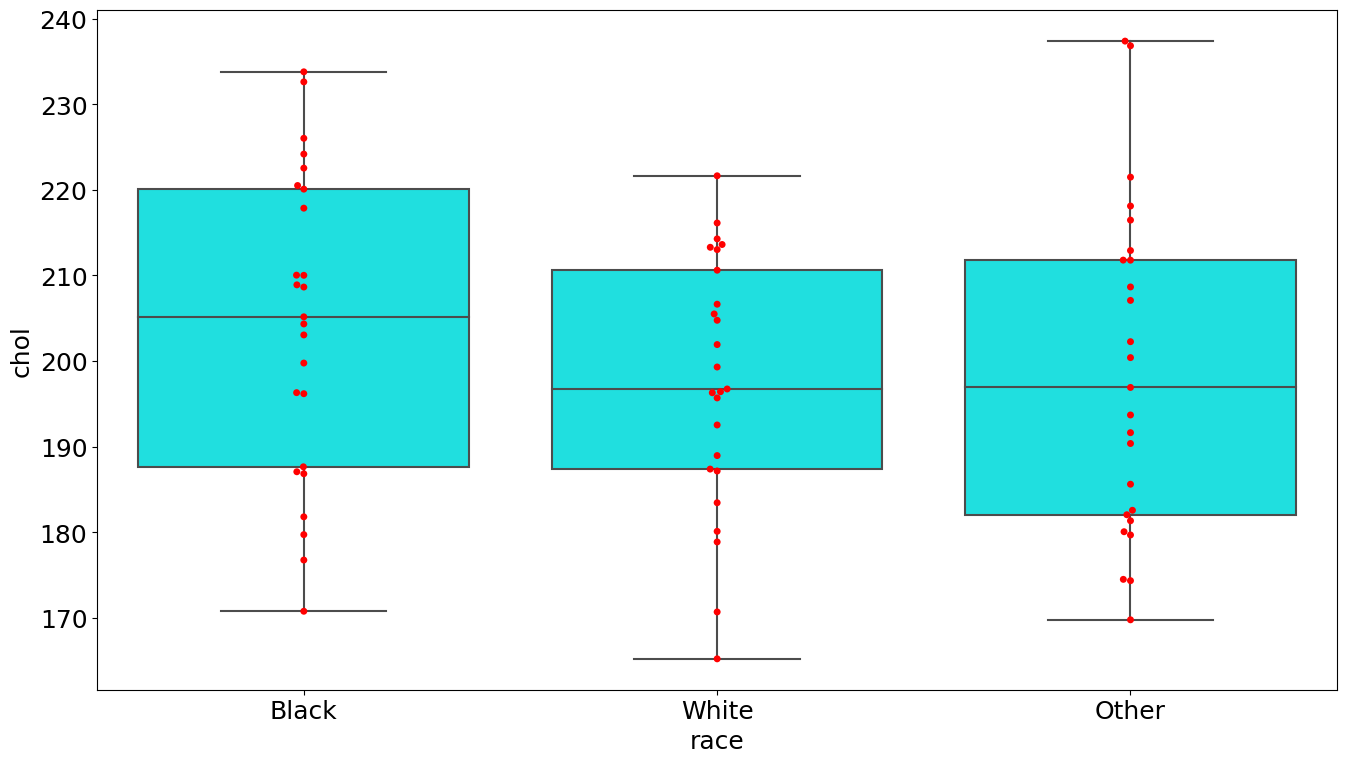

In [39]:
# Kỹ thuật EDA:
sns.boxplot(x='race', y='chol', data=cl_df, color='cyan')
sns.swarmplot(x="race", y="chol", data=cl_df, color='red')
plt.show()

In [40]:
race_chol_df = cl_df[['race', 'chol']].copy()
white = race_chol_df[race_chol_df['race']=='White']
black = race_chol_df[race_chol_df['race']=='Black']
other = race_chol_df[race_chol_df['race']=='Other']

In [41]:
p = {}
p['f_score'], p['p_value'] = stats.f_oneway(white['chol'],black['chol'],other['chol'])
results(p)

,f_score,p_value,KetLuan
,1.108161,0.33573,Chấp nhận H0 với mức ý nghĩa 0.05
